# import modules

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
from nilearn import input_data, datasets
from nilearn import plotting
from nilearn.image import new_img_like
import nilearn

# define onsets

In [66]:

onsets_view   = [6,66,127,187,248,308,369,429,490,550,611,671]
onsets_imagine = [47,108,168,229,289,350,410,471,531,592,652,713]

subjs = [   'PSA038',
            'PSA009',
            'PSA078',
            'PSA153',
            'PSA131',
            'PSA086',
            'PSA144',
            'PSA108',
            'PSA030',
            'PSA041',
            'PSA068',
            'PSA056',
            'PSA132',
            'PSA019',
            'PSA027',
            'PSA028',
            'PSA016',
            'PSA005',
            'PSA061',
            'PSA010',
            'PSA128',
            'PSA003',
            'PSA156',
            'PSA119',
            'PSA032',
            'PSA127',
            'PSA079',
            'PSA094',
            'PSA008',
            'PSA036',
            'PSA112',
            'PSA007',
            'PSA151',
            'PSA120',
            'PSA017',
            'PSA029',
            'PSA026',
            'PSA069',
            'PSA142',
            'PSA109']

# load one example file

In [67]:
curr_file   = '../data_realcost/' + subjs[0] + '_shen_extracted_hp001_lp012_ltr_stand.npy'
print(curr_file)

current_time_series = np.load(curr_file)
current_time_series.shape

../data_realcost/PSA038_shen_extracted_hp001_lp012_ltr_stand.npy


(735, 268)

In [ ]:
#1 set up the files 1 masker file, 1 funct file, import relevant stuff

#2 set up the masker and fit it on some file

#3 do the results computation you want to visualize, leading to a vector with e.g. 1,268 values

#4 "map" that vector back into the brain space, i.e. inverse transform the masker

#5 plot the results via nilearn plotting

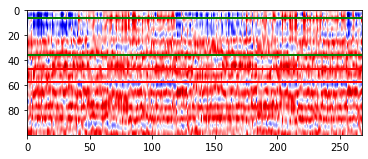

In [4]:
#plt.figure(figsize = (3,15))
plt.imshow(current_time_series[:100, :], cmap = 'seismic');
plt.axhline(6, color = 'green', linewidth=2)
plt.axhline(36, color = 'green', linewidth=2)

plt.axhline(47, color = 'red', linewidth=2)
plt.axhline(57, color = 'red', linewidth=2)

# combine time series data

In [68]:
all_data = []

for curr_sub in subjs:
    data_file_to_load   = '../data_realcost/' + curr_sub + '_shen_extracted_hp001_lp012_ltr_stand.npy'
    print(data_file_to_load)
    curr_data = np.load(data_file_to_load)
    print(curr_data.shape)
    all_data.append(curr_data)

all_data = np.asarray(all_data)
all_data.shape

#data_file_to_load   = '../data_realcost/' + subjs[2] + '_shen_extracted_hp001_lp012_ltr_stand.npy'
#print(data_file_to_load)

#current_time_series = np.load(data_file_to_load)
#current_time_series.shape

../data_realcost/PSA038_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA009_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA078_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA153_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA131_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA086_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA144_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA108_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA030_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA041_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA068_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA056_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_realcost/PSA132_shen_extracted_hp001_lp012_ltr_stand.npy
(735, 268)
../data_real

(40, 735, 268)

In [54]:
shen_dict = np.load('../data_realcost/shen_dictionary.npy', allow_pickle=True).item()
shen_dict[1]['name']

'92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'

In [49]:
shen_dict[89]

{'coords': [8.047619047619051, -22.923809523809524, 44.99047619047619],
 'name': '47.38% Precentral_Gyrus; 46.19% Cingulate_Gyrus_posterior_division; 5.24% Cingulate_Gyrus_anterior_division'}

In [ ]:
key_regions         = [89]
key_regions_label   = [89]
colorlist           = ['blue']

for count in range(1):  
    curr_region_dictidx = key_regions[count]
    print(shen_pauli_aan_dict[curr_region_dictidx])

    all_file       = filepath
    all_img        = nilearn.image.load_img(all_file)
    all_data       = all_img.get_fdata()

    all_data[np.where(all_data!= curr_region_dictidx)] = 0
    all_new_img    = new_img_like(all_img, all_data.astype(int))

    current_title  = key_regions_label[count]
    display = plotting.plot_glass_brain(None,
                                           title = current_title)
    display.add_contours(all_new_img, filled=True, colors=colorlist[count])
    plt.show()

take precuneus mask, extract every voxel and then compute a precuneus viewing pattern 

{'coords': [8.047619047619051, -22.923809523809524, 44.99047619047619], 'name': '47.38% Precentral_Gyrus; 46.19% Cingulate_Gyrus_posterior_division; 5.24% Cingulate_Gyrus_anterior_division', 'index_label': 89, 'data_array_index': 88}


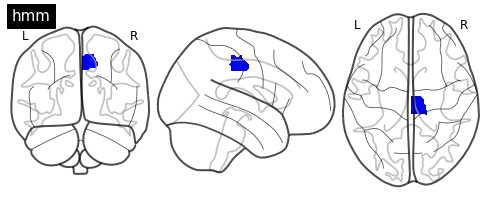

In [50]:
shen_pauli_aan_dict = np.load('../data_realcost/masker/shen_pauli_aan_dict.npy', allow_pickle=True).item()

def check_region(dict='shen_pauli_aan_dict', region_num, filepath=''../data_realcost/masker/shen_2mm_268_parcellation.nii''):
    
    key_regions         = [region_num]
    key_regions_label   = [region_num]
    colorlist           = ['blue']
    name = dict[region_num]
    
    for count in range(1):  
        curr_region_dictidx = key_regions[count]
        print(shen_pauli_aan_dict[curr_region_dictidx])

        all_file       = filepath
        all_img        = nilearn.image.load_img(all_file)
        all_data       = all_img.get_fdata()

        all_data[np.where(all_data!= curr_region_dictidx)] = 0
        all_new_img    = new_img_like(all_img, all_data.astype(int))

        current_title  = key_regions_label[count]
        display = plotting.plot_glass_brain(None,
                                           title = current_title)
        display.add_contours(all_new_img, filled=True, colors=colorlist[count])
        plt.show()
        
    return name, 

# ads and imagining across people, not adjusted for what ad they viewed 

In [6]:
view_length = 30
imagine_length = 10

(40, 268)


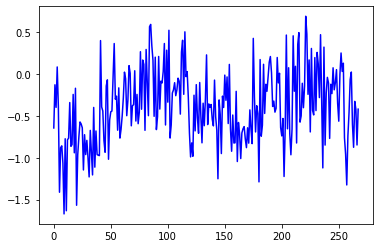

In [77]:
view_ad_1  = np.mean(all_data[:, onsets_view[0]: (onsets_view[0]+view_length), :], axis = 1)
view_ad_2  = np.mean(all_data[:, onsets_view[1]: (onsets_view[1]+view_length), :], axis = 1)
view_ad_3  = np.mean(all_data[:, onsets_view[2]: (onsets_view[2]+view_length), :], axis = 1)
view_ad_4  = np.mean(all_data[:, onsets_view[3]: (onsets_view[3]+view_length), :], axis = 1)
view_ad_5  = np.mean(all_data[:, onsets_view[4]: (onsets_view[4]+view_length), :], axis = 1)
view_ad_6  = np.mean(all_data[:, onsets_view[5]: (onsets_view[5]+view_length), :], axis = 1)
view_ad_7  = np.mean(all_data[:, onsets_view[6]: (onsets_view[6]+view_length), :], axis = 1)
view_ad_8  = np.mean(all_data[:, onsets_view[7]: (onsets_view[7]+view_length), :], axis = 1)
view_ad_9  = np.mean(all_data[:, onsets_view[8]: (onsets_view[8]+view_length), :], axis = 1)
view_ad_10  = np.mean(all_data[:, onsets_view[9]: (onsets_view[9]+view_length), :], axis = 1)
view_ad_11  = np.mean(all_data[:, onsets_view[10]: (onsets_view[10]+view_length), :], axis = 1)
view_ad_12  = np.mean(all_data[:, onsets_view[11]: (onsets_view[11]+view_length), :], axis = 1)
print(view_ad_1.shape)

#plot average brain activity across people in specific region, here it's precuneus 
#part of brain/
plt.plot(view_ad_1[0,:], color='blue') 

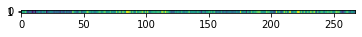

In [76]:
plt.imshow(np.stack((view_ad_1[0,:], view_ad_1[0,:])))

In [64]:
res= all_data[0, onsets_view[0]: (onsets_view[0]+view_length), :]
all_data.shape


(91, 109, 91)

In [9]:
imagine_ad_1 = np.mean(all_data[:, onsets_imagine[0]: (onsets_imagine[0]+imagine_length), :], axis = 1)
imagine_ad_2 = np.mean(all_data[:, onsets_imagine[1]: (onsets_imagine[1]+imagine_length), :], axis = 1)
imagine_ad_3 = np.mean(all_data[:, onsets_imagine[2]: (onsets_imagine[2]+imagine_length), :], axis = 1)
imagine_ad_4 = np.mean(all_data[:, onsets_imagine[3]: (onsets_imagine[3]+imagine_length), :], axis = 1)
imagine_ad_5 = np.mean(all_data[:, onsets_imagine[4]: (onsets_imagine[4]+imagine_length), :], axis = 1)
imagine_ad_6 = np.mean(all_data[:, onsets_imagine[5]: (onsets_imagine[5]+imagine_length), :], axis = 1)
imagine_ad_7 = np.mean(all_data[:, onsets_imagine[6]: (onsets_imagine[6]+imagine_length), :], axis = 1)
imagine_ad_8 = np.mean(all_data[:, onsets_imagine[7]: (onsets_imagine[7]+imagine_length), :], axis = 1)
imagine_ad_9 = np.mean(all_data[:, onsets_imagine[8]: (onsets_imagine[8]+imagine_length), :], axis = 1)
imagine_ad_10 = np.mean(all_data[:, onsets_imagine[9]: (onsets_imagine[9]+imagine_length), :], axis = 1)
imagine_ad_11 = np.mean(all_data[:, onsets_imagine[10]: (onsets_imagine[10]+imagine_length), :], axis = 1)
imagine_ad_12 = np.mean(all_data[:, onsets_imagine[11]: (onsets_imagine[11]+imagine_length), :], axis = 1)

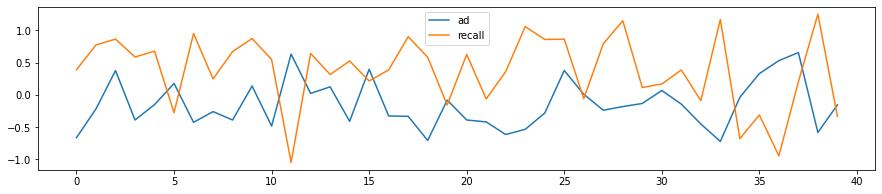

In [43]:
plt.figure(figsize = (15,3))
plt.plot(view_ad_1[:,90], label="ad")
plt.plot(imagine_ad_1[:,90],label="recall")
plt.legend(loc=0)
#np.corrcoef(view_ad_1, imagine_ad_1)

(40, 268)


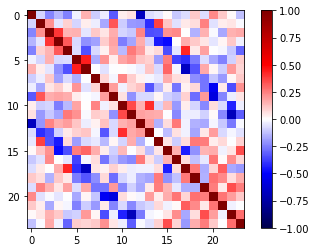

In [112]:
vectors = np.vstack((view_ad_1[:,89],
                     view_ad_2[:,89],
                     view_ad_3[:,89],
                     view_ad_4[:,89],
                     view_ad_5[:,89],
                     view_ad_6[:,89],
                     view_ad_7[:,89],
                     view_ad_8[:,89],
                     view_ad_9[:,89],
                     view_ad_10[:,89],
                     view_ad_11[:,89],
                     view_ad_12[:,89],
                     imagine_ad_1[:,89],
                     imagine_ad_2[:,89],
                     imagine_ad_3[:,89],
                     imagine_ad_4[:,89],
                     imagine_ad_5[:,89],
                     imagine_ad_6[:,89],
                     imagine_ad_7[:,89],
                     imagine_ad_8[:,89],
                     imagine_ad_9[:,89],
                     imagine_ad_10[:,89],
                     imagine_ad_11[:,89],
                     imagine_ad_12[:,89],))
print(imagine_ad_1.shape)
plt.imshow(np.corrcoef(vectors), cmap = 'seismic', vmin = -1, vmax = 1);
plt.colorbar()

In [115]:
shen_file       = '../data_realcost/masker/shen_2mm_268_parcellation.nii'

shen_masker = input_data.NiftiLabelsMasker(shen_file, 
                                             detrend     = True, 
                                             standardize = True,
                                             high_pass   = 0.01, 
                                             t_r         = 1.0,  #check!
                                             low_pass    = 0.12 );

In [133]:
roi = 89

view_ads = [view_ad_1,view_ad_2,view_ad_3,view_ad_4,view_ad_5,view_ad_6,
            view_ad_7,view_ad_8,view_ad_9,view_ad_10,view_ad_11,view_ad_12]

imagine_ads = [imagine_ad_1,imagine_ad_2,imagine_ad_3,imagine_ad_4,imagine_ad_5,imagine_ad_6,
            imagine_ad_7,imagine_ad_8,imagine_ad_9,imagine_ad_10,imagine_ad_11,imagine_ad_12]


for i in range(12):
    corcoef_ads = []
    cor = np.corrcoef(view_ads[i][:,roi], imagine_ads[i][:,roi])[0,1]
    print(np.corrcoef(view_ads[i][:,roi], imagine_ads[i][:,roi])[0,1])
    corcoef_ads.append(cor)

print(corcoef_ads)

corcoef_ad = [-0.6739030870712747,
-0.41116691173000025,
-0.3410988111859222,
-0.4766760089509342,
-0.05299687908186617,
-0.4096732405191169,
-0.3333513773016511,
-0.27313033708055484,
-0.5261261724824301,
-0.23675027784164226,
-0.43369277644486565,
-0.3132939889146413]

avg_ad_cor = np.mean(corcoef_ads)
print('The average correlation coefficient between viewing and imagining an ad is',round(avg_ad_cor,3))

-0.6739030870712747
-0.41116691173000025
-0.3410988111859222
-0.4766760089509342
-0.05299687908186617
-0.4096732405191169
-0.3333513773016511
-0.27313033708055484
-0.5261261724824301
-0.23675027784164226
-0.43369277644486565
-0.3132939889146413
The average correlation coefficient between viewing and imagining an ad is -0.373


In [118]:
#r2       = np.zeros((1,268))
#r2[0,89] = 1
#print(r2.shape)

#res_img  = shen_masker.inverse_transform(r2);
#plotting.plot_glass_brain(nilearn.image.index_img(res_img,0), 
#                          colorbar=True, 
#                          annotate = True,
#                          cmap="Blues", 
#                          threshold=0.15,
#                          plot_abs=False, 
#                         );